##### ARMA - Auto regressive moving average model expects your data to be the stationary
- When data is stationary there graph flactuate around the mean and there will not be any trend. There may be seasonality/perodity (D-Mart sales is raising on weekends). There may also be cyclicity where depending on external factors your graph will flactuate (i.e Increasing the steel perices)

#### ARIMA - is used when data is non stationary, I i.e integrator used to represent non stationary data and d value is set in ARIMA 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
from datetime import datetime

%matplotlib inline

In [2]:
df = pd.read_csv('amzon_revenue.csv', parse_dates = ['Quarter'], date_parser = lambda x:datetime.strptime(x, '%m/%d/%Y'))

In [3]:
df.head()

,Quarter,Revenue,Net Income
0,2020-03-31,75452,2535
1,2019-12-31,87437,3268
2,2019-09-30,69981,2134
3,2019-06-30,63404,2625
4,2019-03-31,59700,3561


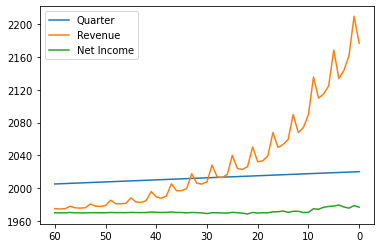

In [5]:
df.plot().invert_xaxis()

## KPSS TEST
### Null hypothesis - Series is stationary
### Alternate hypothesis - Series is not stationary

In [6]:
from statsmodels.tsa.stattools import kpss

In [7]:
stats, p, lags, critical_values = kpss(df['Revenue'], 'ct')

C:\Users\RuturajMane\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\stattools.py:2018: InterpolationWarning: The test statistic is outside of the range of p-values available in the
look-up table. The actual p-value is smaller than the p-value returned.

  warnings.warn(


In [8]:
if p < 0.05:
    print('We reject the null hypothesis')
    print('Data is not stationary')
else:
    print('Data is stationary')

We reject the null hypothesis
Data is not stationary


In [11]:
print(stats, '\n',lags, '\n', critical_values)

0.30665545975169417 
 4 
 {'10%': 0.119, '5%': 0.146, '2.5%': 0.176, '1%': 0.216}


## ADF TEST
### NULL HYPOTHESIS - Series posses a unit root hence not stationary
### ALTERNATE HYPOTHESIS - Series is stationary

In [12]:
from statsmodels.tsa.stattools import adfuller
results = adfuller(df['Revenue'])
p = results[1]

In [15]:
if p < 0.05:
    print('We reject the null hypothesis hence data is stationary')
else:
    print('Data is not stationary')
print(p)

Data is not stationary
0.1294794312183885
